Step1:Take a random 60% samples for training and the rest 40% for test.

In [13]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
import numpy as np
from sklearn.cross_validation import  cross_val_score


#import pandas as pd
titanic = pd.read_csv('D:\SIT_Class\EE695Machine Learning\HW2\Titanic.csv')
#titanic.head()
#titanic.info()

x = titanic[['pclass','age','sex','sibsp']]
y = titanic['survived']
fname = ['pclass','age','sex','sibsp']
x.info()
#print(x['age'].mode())
x['age'].fillna(24.0,inplace = True)
#x.info()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 99)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False)
x_train = vec.fit_transform(x_train.to_dict(orient='record'))
print(vec.feature_names_)
x_test = vec.fit_transform(x_test.to_dict(orient='record'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null object
age       1046 non-null float64
sex       1309 non-null object
sibsp     1309 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB
['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male', 'sibsp']


D:\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Step2:Plot the full tree.

In [14]:
#Using decision tree for classification
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
print("clf:" + str(clf))
print("\n")

with open("Step2.dot",'w') as f:
    f=tree.export_graphviz(clf,out_file=f,
                              feature_names = vec.feature_names_,
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )

from subprocess import call
call(['dot','-T','png','Step2.dot','-o','HW2_BinXu_Step2.png'])
print("Step2:")
print("The full tree has been printed out as HW2_BinXu_Step2.png")

clf:DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Step2:
The full tree has been printed out as HW2_BinXu_Step2.png


Step3:check the performance of the full model: in‐sample and out-of‐sample accuracy

In [15]:
##########################################################
#predict test data and train data accuracy
y_predict_test = clf.predict(x_test)
y_predict_train= clf.predict(x_train)

from sklearn.metrics import accuracy_score

print("Step3:")
print ("accuracy in sample(training set) : "+str(accuracy_score(y_train, y_predict_train)))
print ("accuracy out of sample (test set) : "+str(accuracy_score(y_test, y_predict_test)))
print("\n")
from sklearn.metrics import confusion_matrix
#confusion matrix
print("Training set:")
print(pd.DataFrame(
    confusion_matrix(y_train, y_predict_train),
    columns=['Predicted Fatalities', 'Predicted Survival'],
    index=['True Fatalities', 'True Survival']
))
print("\n")
a=[]
a=confusion_matrix(y_train, y_predict_train)
print("Percent of survivors correctly predicted(on training set):")
print(a[1][1]/(a[1][1]+a[1][0]))
print("Percent of fatalities correctly predicted(on training set):")
print(a[0][0]/(a[0][1]+a[0][0]))
print("\n")
print("Test set:")
print(pd.DataFrame(
    confusion_matrix(y_test, y_predict_test),
    columns=['Predicted Fatalities', 'Predicted Survival'],
    index=['True Fatalities', 'True Survival']
))
print("\n")
b=[]
b=confusion_matrix(y_test, y_predict_test)
print("Percent of survivors correctly predicted(on test set):")
print(b[1][1]/(b[1][1]+b[1][0]))
print("Percent of fatalities correctly predicted(on test set):")
print(b[0][0]/(b[0][1]+b[0][0]))
############################################################

Step3:
accuracy in sample(training set) : 0.895541401274
accuracy out of sample (test set) : 0.75572519084


Training set:
                 Predicted Fatalities  Predicted Survival
True Fatalities                   466                  20
True Survival                      62                 237


Percent of survivors correctly predicted(on training set):
0.792642140468
Percent of fatalities correctly predicted(on training set):
0.958847736626


Test set:
                 Predicted Fatalities  Predicted Survival
True Fatalities                   276                  47
True Survival                      81                 120


Percent of survivors correctly predicted(on test set):
0.597014925373
Percent of fatalities correctly predicted(on test set):
0.854489164087


In [24]:
##########################################################
y_predict = clf.predict(x_test)
from sklearn.metrics import classification_report
print("Accuracy score:" + str(clf.score(x_train,y_train)))
print("\n")
#print(clf.score(x_train,y_train))
#print(classification_report(y_predict,y_test))

tree.export_graphviz(clf,out_file = 'tree.dot')
#from sklearn.model_selection import KFold
meanlist =[]
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

        meanlist.append(score.mean_validation_score)


    return top_scores[0].parameters, meanlist

Accuracy score:0.895541401274




Step4:Find the minimum number of misclassification and choose the corresponding tree size to prune the tree.

Model with rank: 1
Mean validation score: 0.792 (std: 0.059)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.792 (std: 0.059)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.786 (std: 0.057)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.802 (std: 0.048)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.807 (std: 0.044)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.809 (std: 0.043)
Parameters: {'criteri

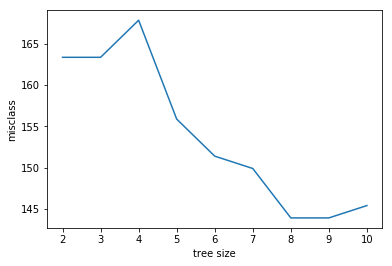

In [25]:
for i in range(2,11):
    param = {'criterion':['gini','entropy'],
             "min_samples_split":[2,10,20],
             "max_depth":[None,2,5,10],
             "min_samples_leaf":[1,5,10],
             "max_leaf_nodes": [i]}
    grid_search = GridSearchCV(clf,param,cv=10)
    grid_search.fit(x_test,y_test)
    [best_par,meanlist] = report(grid_search.grid_scores_,1)
#    print(grid_search.grid_scores_)
print(meanlist)
#print(best_par)

treesize = [2,3,4,5,6,7,8,9,10]
misclass = []
for acc in meanlist:
    misclass.append((1-acc)*1309*0.6)
    

good_par = report(grid_search.grid_scores_,3)[0]

prune_tree = tree.DecisionTreeClassifier(**good_par)
prune_tree.fit(x_train,y_train)
tree.export_graphviz(prune_tree,out_file="prune.dot")
y_predict_new = prune_tree.predict(x_test)
print(classification_report(y_predict_new,y_test))

#print(results)
import pylab as pl
pl.plot(treesize,misclass)
pl.xlabel('tree size')
pl.ylabel('misclass')
pl.show() 

Stpe5:Prune the tree with the optimal tree size. Plot the pruned tree.

In [27]:
# best tree
best_tree=tree.DecisionTreeClassifier(max_leaf_nodes=8,criterion="entropy")
best_tree=best_tree.fit(x_train,y_train)

#Visulize
with open("Step5.dot",'w') as f:
    f=tree.export_graphviz(best_tree,out_file=f,
                              feature_names =vec.feature_names_,
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
    # graph=graphviz.Source(f)
from subprocess import call
call(['dot','-T','png','Step5.dot','-o','HW2_BinXu_Step5.png'])
print("Step5:")
print("The optimal tree has been printed out as HW2_BinXu_Step5.png")


Step5:
The optimal tree has been printed out as HW2_BinXu_Step5.png


Step6:Report as many details as you can on the final pruned tree.

In [28]:
y_predict_test2 = best_tree.predict(x_test)
y_predict_train2= best_tree.predict(x_train)

print("Step6:")
print ("accuracy in sample(training set) : "+str(accuracy_score(y_train, y_predict_train2)))
print ("accuracy out of sample (test set) : "+str(accuracy_score(y_test, y_predict_test2)))
print("\n")
from sklearn.metrics import confusion_matrix
#confusion matrix
print("Training set:")
print(pd.DataFrame(
    confusion_matrix(y_train, y_predict_train2),
    columns=['Predicted Fatalities', 'Predicted Survival'],
    index=['True Fatalities', 'True Survival']
))
print("\n")
a=[]
a=confusion_matrix(y_train, y_predict_train2)
print("Percent of survivors correctly predicted(on training set):")
print(a[1][1]/(a[1][1]+a[1][0]))
print("Percent of fatalities correctly predicted(on training set):")
print(a[0][0]/(a[0][1]+a[0][0]))
print("\n")
print("Test set:")
print(pd.DataFrame(
    confusion_matrix(y_test, y_predict_test2),
    columns=['Predicted Fatalities', 'Predicted Survival'],
    index=['True Fatalities', 'True Survival']
))
print("\n")
b=[]
b=confusion_matrix(y_test, y_predict_test2)
print("Percent of survivors correctly predicted(on test set):")
print(b[1][1]/(b[1][1]+b[1][0]))
print("Percent of fatalities correctly predicted(on test set):")
print(b[0][0]/(b[0][1]+b[0][0]))

Step6:
accuracy in sample(training set) : 0.808917197452
accuracy out of sample (test set) : 0.80534351145


Training set:
                 Predicted Fatalities  Predicted Survival
True Fatalities                   416                  70
True Survival                      80                 219


Percent of survivors correctly predicted(on training set):
0.732441471572
Percent of fatalities correctly predicted(on training set):
0.855967078189


Test set:
                 Predicted Fatalities  Predicted Survival
True Fatalities                   279                  44
True Survival                      58                 143


Percent of survivors correctly predicted(on test set):
0.71144278607
Percent of fatalities correctly predicted(on test set):
0.863777089783


After pruned the tree the 
accuracy in sample(training set) : 80.89%
accuracy out of sample (test set) : 80.53%

By comparing the previous the accuracy
accuracy in sample(training set) : 89.55%
accuracy out of sample (test set) : 75.57%

The accuracy out of sample (test set) is better after pruned the tree(80.53%>75.57%).

By using the DecisionTreeClassifier() function, the max_leaf_nodes should be 8 to prune the tree. Because the accuracy out of sample for prune is 81.92%, the highest number.

After pruned the tree the :
Percent of survivors correctly predicted(on training set): 73.24%
Percent of fatalities correctly predicted(on training set):85.59%
Percent of survivors correctly predicted(on test set):71.14%
Percent of fatalities correctly predicted(on test set):86.37%

There is indead an improvement in out of sample for the full tree and the pruned tree.
